# NAME : Ayush Vitthal Gole 

# task 2 : Prediction using Unsupervised ML


### importing basic needed libraries

In [152]:
import pyforest

### Loading data set and making it as data frame df

In [153]:
df =  pd.read_csv(r'C:\Users\Admin\Downloads\Iris.csv')
df

<IPython.core.display.Javascript object>

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### getting all statistical data of data set df

In [154]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### checking is there any null value present in data set or not  as it can cause error 

In [155]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Species column have categorial data so we cant fit or work on it further so transforming it into numerical data

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
catnum = ['Species']
for i in catnum:
    df[i] =le.fit_transform(df[i])
df['Species'].unique()

array([0, 1, 2])

### standardization of data is important so 

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfs = sc.fit_transform(df)

### using elbow method to find optimum value of k (clusters)

#### elbow by method 1 

In [158]:
from sklearn.cluster import KMeans
ssq = []
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=112)
    result = km.fit(dfs)
    ssq.append(km.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

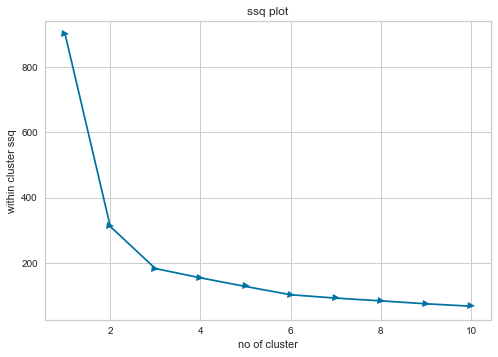

In [159]:
plt.plot(range(1,11),ssq,marker  = '>')
plt.xlabel("no of cluster")
plt.ylabel("within cluster ssq")
plt.title("ssq plot")
plt.show()

#### elbow method by method 2

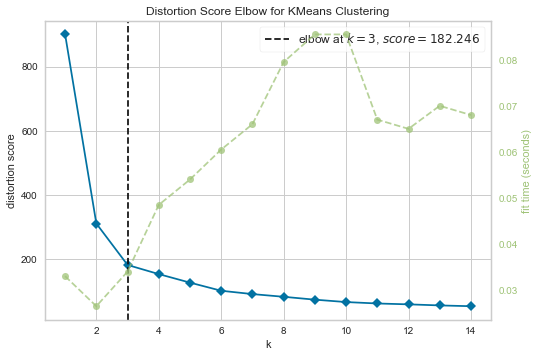

In [160]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(1,15), timings= True) # k is range of number of clusters.
visualizer.fit(dfs)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

###   so by elbow method we got value of k = 3lets apply it further on data set for clustering

In [161]:
km  = KMeans(n_clusters=3,random_state=53)
result = km.fit(dfs)
result

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=53, tol=0.0001, verbose=0)

### as we have ready Kmean algo. apply it to data set again to check whether it is giving right values or not

In [162]:
predictions = result.fit_predict(dfs)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###  showing scatter plot of clusters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

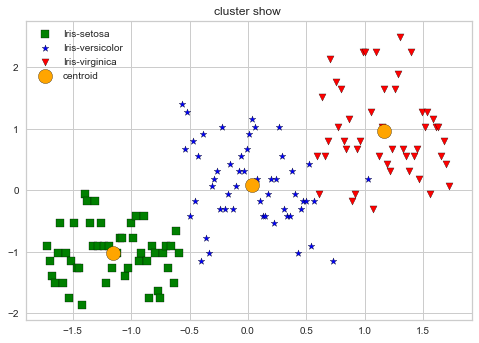

In [163]:
plt.scatter(dfs[predictions == 0, 0],dfs[predictions == 0,1], s=50 , c = "green", marker = "s", edgecolors = 'black' , label  = "Iris-setosa") 
plt.scatter(dfs[predictions == 1, 0],dfs[predictions == 1,1], s=50 , c = "blue", marker = "*", edgecolors = "black" , label  = "Iris-versicolor")
plt.scatter(dfs[predictions == 2, 0],dfs[predictions == 2,1], s=50 , c = "red", marker = "v", edgecolors = "black" , label  = "Iris-virginica") 
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s =200 ,c = "orange", marker = "o",edgecolors = "black",label = "centroid")
plt.legend(scatterpoints  =1)
plt.title("cluster show ")
plt.show()